<a href="https://colab.research.google.com/github/DhanuMW/Data_Science_Projects/blob/main/Iris_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification Project

The project expects building a model to predict the class of Iris plant. It is a classification task and hence it is experimented using 60-20-20 ratio and 80-10-10 ratio of training, validation, and test data. The GridSearchCV is implemented for logistic regression, random forest, and boosting algorithms to find the optimal hyperparameters.

### Exploratory Data Analysis

The libraries and data are imported and then the data are analyzed to have a better understanding.

In [ ]:
#import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#read the dataset
iris = pd.read_csv('D:\AIDI\AIDI 1003 Machine Learning Frameworks\Assignments\Project 1\iris.csv')

#print the first 5 rows/labels/indexes
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.describe() #describe the details of the dataset

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#identify the average values of each feature for the 3 varieties
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


Understand the dataset using different types of histograms.

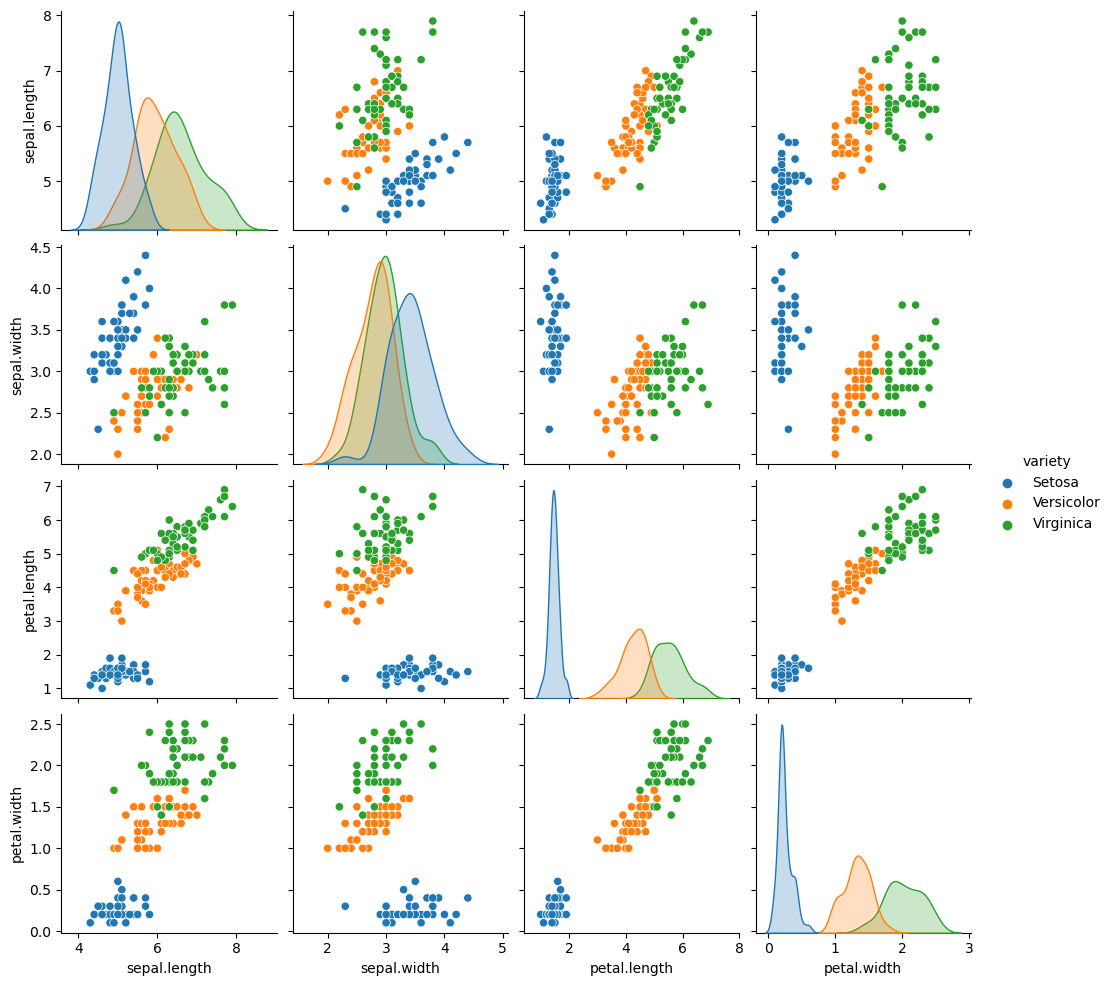

In [ ]:
sns.pairplot(iris, hue='variety', aspect=1)

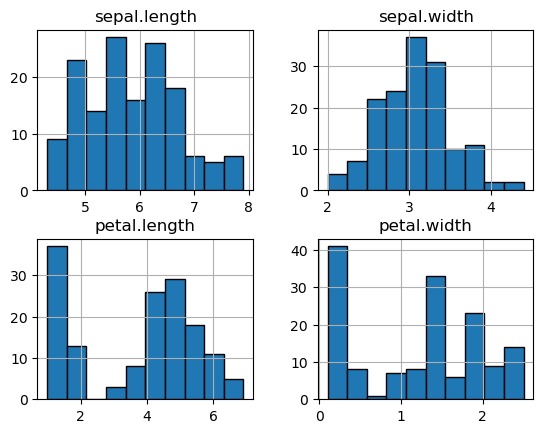

In [ ]:
iris.hist(edgecolor='black')
plt.show()

<Axes: xlabel='variety', ylabel='petal.width'>

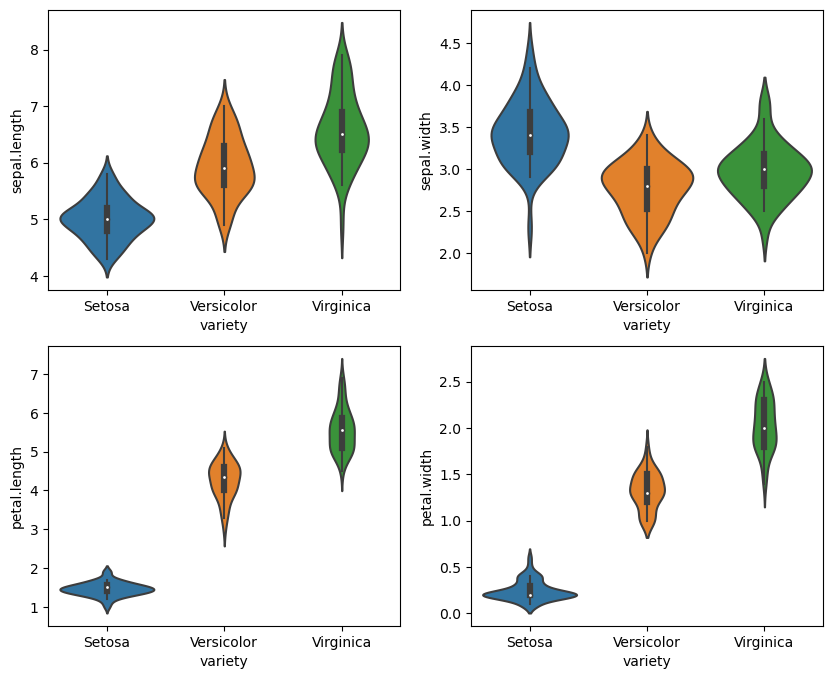

In [ ]:
#get a better idea of the variations of the 3 types using violinplots
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(x='variety',y='sepal.length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='variety',y='sepal.width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='variety',y='petal.length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='variety',y='petal.width',data=iris)

Encode the target variables into numeric values.

In [ ]:
#converting the output data into numeric values
import sklearn
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris['variety'] = label_encoder.fit_transform(iris['variety'])

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Write out cleaned data to iris_cleaned.csv file.

In [ ]:
iris.to_csv('D:\AIDI\AIDI 1003 Machine Learning Frameworks\Assignments\Project 1\iris_cleaned.csv', index=False)

### Splitting the Data

In [ ]:
#split data into train, validation, and test sets
from sklearn.model_selection import train_test_split
iris_ready = pd.read_csv('D:\AIDI\AIDI 1003 Machine Learning Frameworks\Assignments\Project 1\iris_cleaned.csv')

iris_ready.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
features = iris.drop('variety', axis=1) #input data
labels = iris['variety'] #output data

Splitting data in 60-20-20 ratio.

In [ ]:
x_train_60, x_test_60, y_train_60, y_test_60 = train_test_split(features, labels, test_size=0.4, random_state=42)
x_test_60, x_val_60, y_test_60, y_val_60 = train_test_split(x_test_60, y_test_60, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train_60, y_val_60, y_test_60]:
    print(round(len(dataset)/len(labels), 2))

0.6
0.2
0.2


Splitting data in 80-10-10 ratio.

In [ ]:
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(features, labels, test_size=0.2, random_state=42)
x_test_80, x_val_80, y_test_80, y_val_80 = train_test_split(x_test_80, y_test_80, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train_80, y_val_80, y_test_80]:
    print(round(len(dataset)/len(labels), 2))

0.8
0.1
0.1


Writing splitted data to .csv files.

In [ ]:
x_train_60.to_csv('tr_features_60.csv', index=False)
x_val_60.to_csv('val_features_60.csv', index=False)
x_test_60.to_csv('te_features_60.csv', index=False)

y_train_60.to_csv('tr_labels_60.csv', index=False)
y_val_60.to_csv('val_labels_60.csv', index=False)
y_test_60.to_csv('te_labels_60.csv', index=False)

x_train_80.to_csv('tr_features_80.csv', index=False)
x_val_80.to_csv('val_features_80.csv', index=False)
x_test_80.to_csv('te_features_80.csv', index=False)

y_train_80.to_csv('tr_labels_80.csv', index=False)
y_val_80.to_csv('val_labels_80.csv', index=False)
y_test_80.to_csv('te_labels_80.csv', index=False)


## Experimentation for 60-20-20 Ratio

In [ ]:
import joblib #import joblib library

### Fit a Model Using Logistic Regression

In [ ]:
#importing the logistic regression algorithm from Scikit-learn library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings #to ignore any future warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#consider x_train_60 and y_train_60

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

Implementation of K-Fold cross validation and GridSearchCV to find the optimal parameters.

In [ ]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

#implementation of Kfold cross validation
cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(x_train_60, y_train_60.values.ravel())

print_results(cv)

C:\Users\Dhanushi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dhanushi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

BEST PARAMS: {'C': 1}

0.622 (+/-0.333) for {'C': 0.001}
0.833 (+/-0.199) for {'C': 0.01}
0.911 (+/-0.166) for {'C': 0.1}
0.944 (+/-0.172) for {'C': 1}
0.944 (+/-0.122) for {'C': 10}
0.944 (+/-0.172) for {'C': 100}
0.944 (+/-0.172) for {'C': 1000}


C:\Users\Dhanushi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dhanushi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Display the optimal hyperparameters for the Gradient Boosting Classifier algorithm.

In [ ]:
cv.best_estimator_

LogisticRegression(C=1)

Write out the pickled model as LR_model_60.pkl.

In [ ]:
joblib.dump(cv.best_estimator_, 'LR_model_60.pkl')

['LR_model_60.pkl']

### Fit a Model Using Random Forest

In [ ]:
#importing the random forest classifier algorithm from Scikit-learn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings #to ignore any future warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#consider x_train_60 and y_train_60

Implementation of K-Fold cross validation and GridSearchCV to find the optimal parameters.

In [ ]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

#implementation of Kfold cross validation
cv = GridSearchCV(rf, parameters, cv=5)

#feeding the training datasets to the model
cv.fit(x_train_60, y_train_60.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 32, 'n_estimators': 50}

0.878 (+/-0.276) for {'max_depth': 2, 'n_estimators': 5}
0.911 (+/-0.206) for {'max_depth': 2, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 250}
0.922 (+/-0.206) for {'max_depth': 4, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 4, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 4, 'n_estimators': 250}
0.911 (+/-0.194) for {'max_depth': 8, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 8, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 8, 'n_estimators': 250}
0.911 (+/-0.206) for {'max_depth': 16, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 16, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 16, 'n_estimators': 250}
0.922 (+/-0.089) for {'max_depth': 32, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': 32, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 32, 'n_estimators': 250}
0.9 (+/-0.191) for {'max_depth': None, 'n_estimators': 5}
0.922 (+/-0.20

Display the optimal hyperparameters for the Gradient Boosting Classifier algorithm.

In [ ]:
cv.best_estimator_

RandomForestClassifier(max_depth=32, n_estimators=50)

Write out the pickled model as RF_model_60.pkl.

In [ ]:
joblib.dump(cv.best_estimator_, 'RF_model_60.pkl')

['RF_model_60.pkl']

### Fit a Model Using Gradient Boosting

In [ ]:
#importing the gradient boosting classifier algorithm from Scikit-learn library
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import warnings #to ignore any future warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#consider x_train_60 and y_train_60

Implementation of K-Fold cross validation and GridSearchCV to find the optimal parameters.

In [ ]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

#implementation of Kfold cross validation
cv = GridSearchCV(gb, parameters, cv=5)

#feeding the training datasets to the model
cv.fit(x_train_60, y_train_60.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.6 (+/-0.452) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.9 (+/-0.191) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.933 (+/-0.215) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.922 (+/-0.206) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.711 (+/-0.247) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.9 (+/-0.191) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.733 (+/-0.276) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.911 (+/-0.194) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.911 (+/-0.194) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.911 (+/-0.194) for {'learning_rate':

Display the optimal hyperparameters for the Gradient Boosting Classifier algorithm.

In [ ]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)

Write out the pickled model as GB_model_60.pkl.

In [ ]:
joblib.dump(cv.best_estimator_, 'GB_model_60.pkl')

['GB_model_60.pkl']

### Evaluate the Models (60-20-20 Ratio)

Now all 3 models will be evaluated on the validation data set and the best model will be tested using test data set.

In [ ]:
#import metrics to calculate accuracy, precision, and recall from SkiKit-Learn library
from sklearn.metrics import accuracy_score, precision_score, recall_score

#import time to calculate latency
from time import time

#consider x_val_60 and y_val_60 for model evaluation
#consider x_test_60 and y_test_60 for testing the best model

Load the pickled model to test validation in order to chose the best suited model for the given problem.

In [ ]:
#load all 3 models at once
models = {}

for mdl in ['LR', 'RF', 'GB']:
    models[mdl] = joblib.load('{}_model_60.pkl'.format(mdl))

In [ ]:
#display the optimal hyperparameters for the 3 models
models

{'LR': LogisticRegression(C=1),
 'RF': RandomForestClassifier(max_depth=32, n_estimators=50),
 'GB': GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)}

Compare the performance of the models using accuracy, precision, recall, and latency.

In [ ]:
#define the display method for the evaluation results of the model
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name, accuracy, precision, recall, round((end - start)*1000, 1)))

In [ ]:
#perform the evaluation of the models using the validation data set.
for name, mdl in models.items():
    evaluate_model(name, mdl, x_val_60, y_val_60)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
RF -- Accuracy: 0.967 / Precision: 0.976 / Recall: 0.944 / Latency: 6.9ms
GB -- Accuracy: 0.967 / Precision: 0.976 / Recall: 0.944 / Latency: 2.0ms


As per the results Linear Regression algorithm performs best for the iris dataset. And the reason may be because it is a limited dataset and linear regression performs better for small datasets.

In [ ]:
#the best model is tested upon the test dataset.
evaluate_model('Logistic Regression', models['LR'], x_test_60, y_test_60)

Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms


It is confirmed that the selected model acts same for the test set as well.

## Experimentation for 80-10-10 Ratio

The same procedure performed for the 60-20-20 ratio datasets is repeated for the 80-10-10 ratio datasets.

### Fit a Model Using Logistic Regression

In [ ]:
#importing the logistic regression algorithm from Scikit-learn library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings #to ignore any future warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#consider x_train_80 and y_train_80

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

Implementation of K-Fold cross validation and GridSearchCV to find the optimal parameters.

In [ ]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

#implementation of Kfold cross validation
cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(x_train_80, y_train_80.values.ravel())

print_results(cv)

C:\Users\Dhanushi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dhanushi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

BEST PARAMS: {'C': 1}

0.817 (+/-0.201) for {'C': 0.001}
0.858 (+/-0.194) for {'C': 0.01}
0.933 (+/-0.113) for {'C': 0.1}
0.967 (+/-0.097) for {'C': 1}
0.942 (+/-0.113) for {'C': 10}
0.95 (+/-0.122) for {'C': 100}
0.95 (+/-0.122) for {'C': 1000}


C:\Users\Dhanushi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dhanushi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [ ]:
cv.best_estimator_

LogisticRegression(C=1)

Write out the pickled model as LR_model_80.pkl.

In [ ]:
joblib.dump(cv.best_estimator_, 'LR_model_80.pkl')

['LR_model_80.pkl']

### Fit a Model Using Random Forest

In [ ]:
#importing the random forest classifier algorithm from Scikit-learn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings #to ignore any future warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#consider x_train_80 and y_train_80

Implementation of K-Fold cross validation and GridSearchCV to find the optimal parameters.

In [ ]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

#implementation of Kfold cross validation
cv = GridSearchCV(rf, parameters, cv=5)

#feeding the training datasets to the model
cv.fit(x_train_80, y_train_80.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 5}

0.958 (+/-0.091) for {'max_depth': 2, 'n_estimators': 5}
0.933 (+/-0.145) for {'max_depth': 2, 'n_estimators': 50}
0.942 (+/-0.155) for {'max_depth': 2, 'n_estimators': 250}
0.95 (+/-0.122) for {'max_depth': 4, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 4, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 4, 'n_estimators': 250}
0.95 (+/-0.133) for {'max_depth': 8, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 8, 'n_estimators': 50}
0.958 (+/-0.091) for {'max_depth': 8, 'n_estimators': 250}
0.942 (+/-0.113) for {'max_depth': 16, 'n_estimators': 5}
0.95 (+/-0.122) for {'max_depth': 16, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 16, 'n_estimators': 250}
0.95 (+/-0.122) for {'max_depth': 32, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 32, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 32, 'n_estimators': 250}
0.917 (+/-0.129) for {'max_depth': None, 'n_estimators': 5}
0.942 (+/-0.113) for 

In [ ]:
cv.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=5)

In [ ]:
joblib.dump(cv.best_estimator_, 'RF_model_80.pkl')

['RF_model_80.pkl']

### Fit a Model Using Gradient Boosting

In [ ]:
#importing the gradient boosting classifier algorithm from Scikit-learn library
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import warnings #to ignore any future warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#consider x_train_80 and y_train_80

Implementation of K-Fold cross validation and GridSearchCV to find the optimal parameters.

In [ ]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

#implementation of Kfold cross validation
cv = GridSearchCV(gb, parameters, cv=5)

#feeding the training datasets to the model
cv.fit(x_train_80, y_train_80.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.858 (+/-0.208) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.908 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.958 (+/-0.091) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.95 (+/-0.082) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.942 (+/-0.125) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.942 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.942 (+/-0.113) for {'learning_rate

In [ ]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)

In [ ]:
joblib.dump(cv.best_estimator_, 'GB_model_80.pkl')

['GB_model_80.pkl']

### Evaluate the Models (80-10-10 Ratio)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

#consider x_val_80 and y_val_80 for model evaluation
#consider x_test_80 and y_test_80 for testing the best model

In [ ]:
models = {}

for mdl in ['LR', 'RF', 'GB']:
    models[mdl] = joblib.load('{}_model_80.pkl'.format(mdl))

In [ ]:
models

{'LR': LogisticRegression(C=1),
 'RF': RandomForestClassifier(max_depth=2, n_estimators=5),
 'GB': GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)}

Compare the performance of the models using accuracy, precision, recall, and latency.

In [ ]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name, accuracy, precision, recall, round((end - start)*1000, 1)))

In [ ]:
for name, mdl in models.items():
    evaluate_model(name, mdl, x_val_80, y_val_80)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
GB -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms


As per the results, all 3 models perform good but considering the latency Gradient Boosting algorithm can be chosen as the best.

In [ ]:
evaluate_model('Gradient Boosting', models['LR'], x_test_80, y_test_80)

Gradient Boosting -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms


It is confirmed that the selected model acts same for the test set as well.



##### When comparing the two split ratios, the 80-10-10 ratio dataset shows better performance in the model evaluation proces and also the general rule of thumb is to use atleast 70% - 80% for the training set to avoid a bias decision.

###### Student ID: 200571547 | Dhanushi Withanawasam | AIDI_1003